# 0.0. IMPORTS

In [252]:
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns
import tensorflow           as tf
from IPython.display        import Image
from sklearn.preprocessing  import RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics        import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble       import RandomForestClassifier
import inflection
import pylab
import pickle

%matplotlib inline

## 0.1. Help Functions

## 0.2. Loading Dataset

In [2]:
employ_df = pd.read_csv('Human_Resources.csv')

# 1.0. DESCRIÇÃO DOS DADOS

In [3]:
df1 = employ_df.copy()

## 1.1. Rename Columns

In [4]:
cols_old = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']


snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2. Data Dimension

In [5]:
print( 'Numer of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Numer of rows: 1470
Number of columns: 35


## 1.3. Data Type

In [6]:
df1.dtypes

age                            int64
attrition                     object
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_count                 int64
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over18                        object
over_time                     object
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
standard_hours                 int64
s

## 1.4. Check NA

In [7]:
df1.isna().sum()

age                           0
attrition                     0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over18                        0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

## 1.5. Descriptive Statistics

In [8]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

### 1.5.1. Numerical Attributes

In [9]:
#Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#Concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'meean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,meean,median,std,skew,kurtosis
0,age,18.0,60.0,42.0,36.923810,36.0,9.132266,0.413286,-0.404145
1,daily_rate,102.0,1499.0,1397.0,802.485714,802.0,403.371829,-0.003519,-1.203823
2,distance_from_home,1.0,29.0,28.0,9.192517,7.0,8.104107,0.958118,-0.224833
3,education,1.0,5.0,4.0,2.912925,3.0,1.023817,-0.289681,-0.559115
4,employee_count,1.0,1.0,0.0,1.000000,1.0,0.000000,0.000000,0.000000
5,employee_number,1.0,2068.0,2067.0,1024.865306,1020.5,601.819530,0.016574,-1.223179
6,environment_satisfaction,1.0,4.0,3.0,2.721769,3.0,1.092710,-0.321654,-1.202521
7,hourly_rate,30.0,100.0,70.0,65.891156,66.0,20.322512,-0.032311,-1.196398
8,job_involvement,1.0,4.0,3.0,2.729932,3.0,0.711319,-0.498419,0.270999
9,job_level,1.0,5.0,4.0,2.063946,2.0,1.106563,1.025401,0.399152


## 1.5.2 Categorical Attributes

In [10]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

attrition          2
business_travel    3
department         3
education_field    6
gender             2
job_role           9
marital_status     3
over18             1
over_time          2
dtype: int64

# 2.0. FEATURE ENGINEERING 

In [11]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

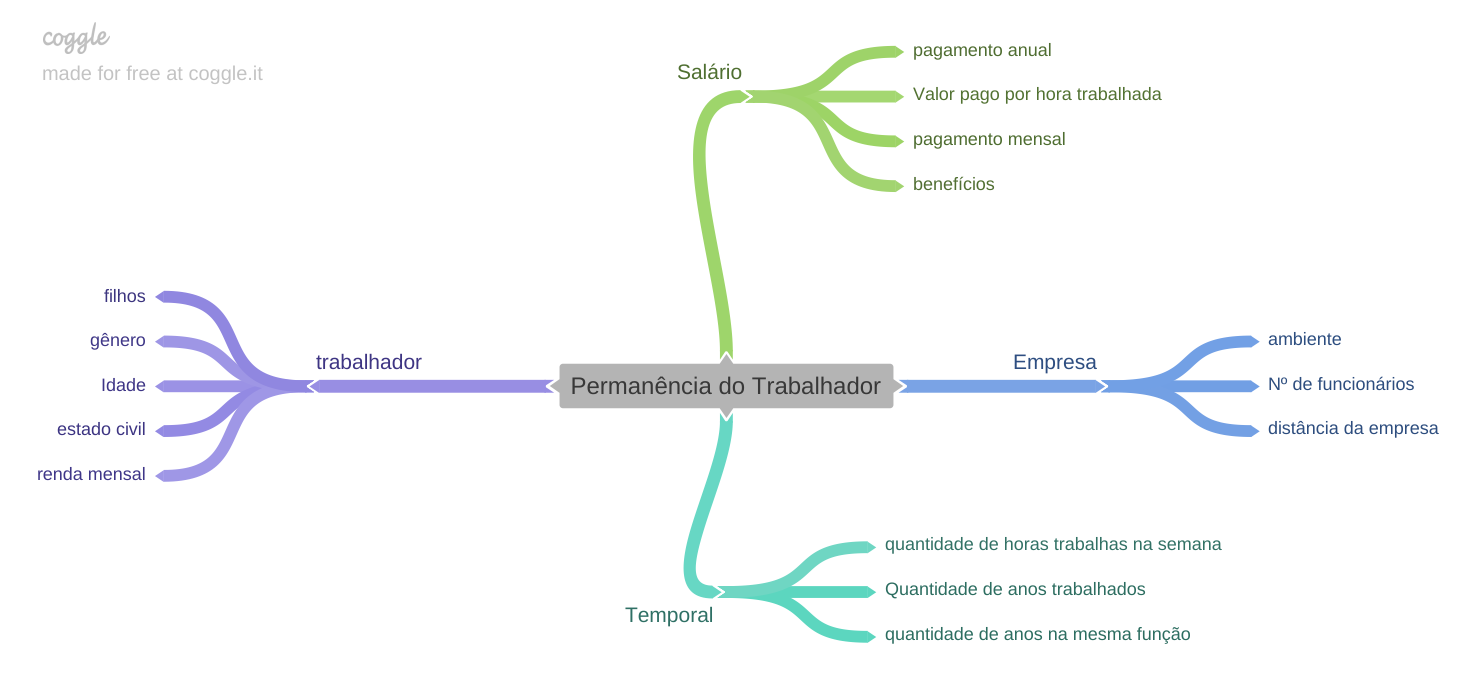

In [12]:
Image( 'img/Permanncia_do_Trabalhador.png' )

## 2.2. Criação de Hipoteses

**1.** Funcionários mais velhos deveriam ter menos tendêcia a sair da empresa.

**2.** Funcionários com mais tempo de educação deveriam ter uma maior tendência em sair da empresa.

**3.** Funcionários com uma maior distância da empresa deveriam ter uma maio tendência em trocar de empresa.

**4.** Funcionários com uma maior satisfação no trabalho deveria ter uma tendência menor em tocar de empresa.

**5.** Quanto maior o aumento percentual do salário menor deveria ser a tendência de troca de empresa.

**6.**  Quanto maior o equilibro da vida profissional menor a tendência de trocar de empresa.

**7.** Quanto mais tempo se passou da ultima promoção maior deveria ser a tendência de trocar de empresa.

**8.** Funcionários com mais anos de trabalho deveriam ter uma tendência menor de torcar de empresa.

**9.** Quanto maior o tempo na função atual menor deveria ser a tendência de trocar de empresa.

## 2.3. FEATURE ENGINEERING 

In [13]:
new_values = { 'Yes':1, 'No':0}
df2['attrition'] = df2['attrition'].map(new_values)

df2['attrition'] = df2['attrition'].astype( int )

# 3.0.FILTRAGEM DE VARIÁVEIS 

In [14]:
df3 = df2.copy()

## 3.1. Seleção das Colunas

In [15]:
cols_drop = ['employee_count', 'standard_hours']

df3 = df3.drop( cols_drop, axis = 1 )

# 4.0. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [16]:
df4 = df3.copy()

## 3.1. Análise Univariada

### 3.1.1. Response Variable

C:\Users\mateu\anaconda3\envs\rh\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


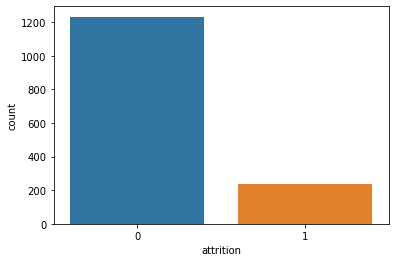

In [17]:
sns.countplot( df4['attrition'] );

### 3.1.2. Numerical Variable

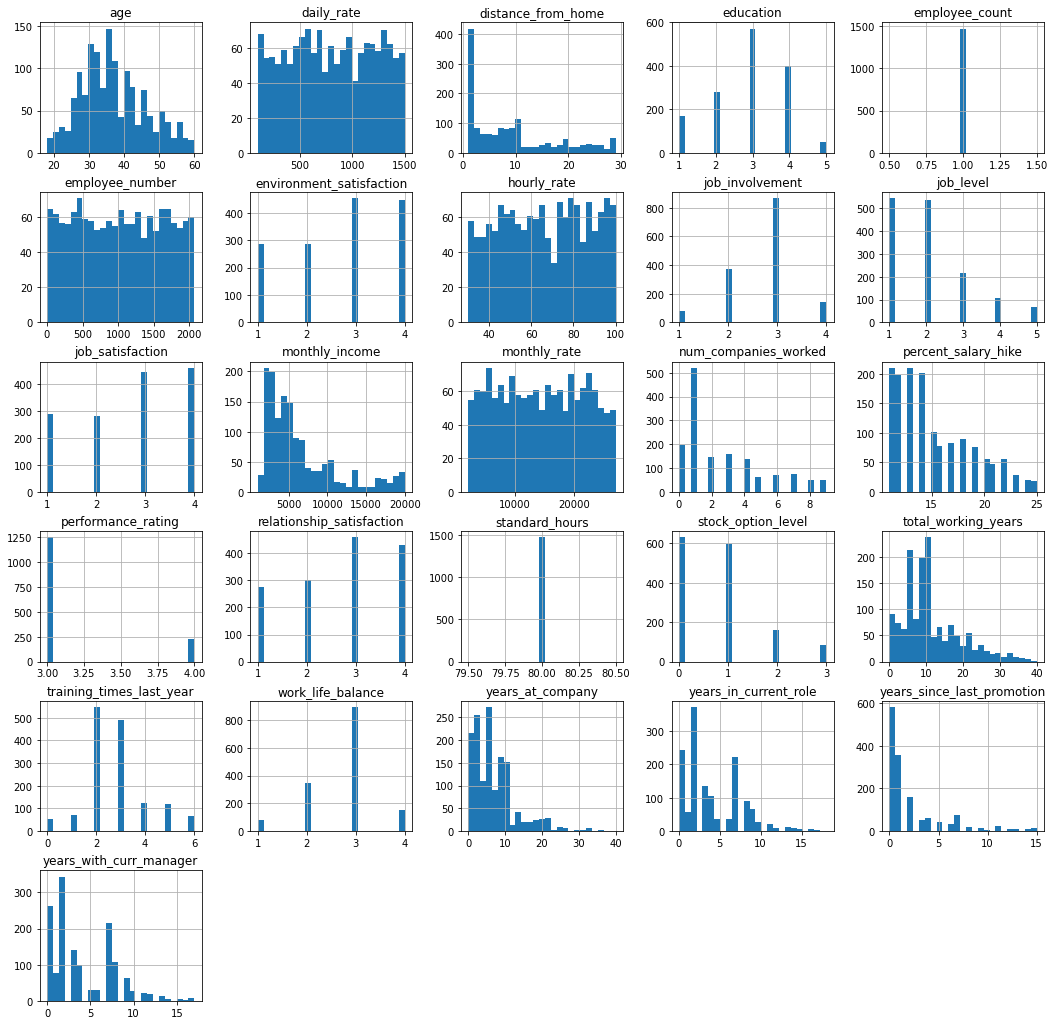

In [18]:
pylab.rcParams['figure.figsize'] = (18.0, 18.0)
num_attributes.hist( bins=25 );

## 3.2. Análise Bivariada

### H1. Funcionários mais velhos deveriam ter menos tendêcia a sair da empresa.

**VERDADEIRA** Funcionários mais velhos deixam menos o trabalho.


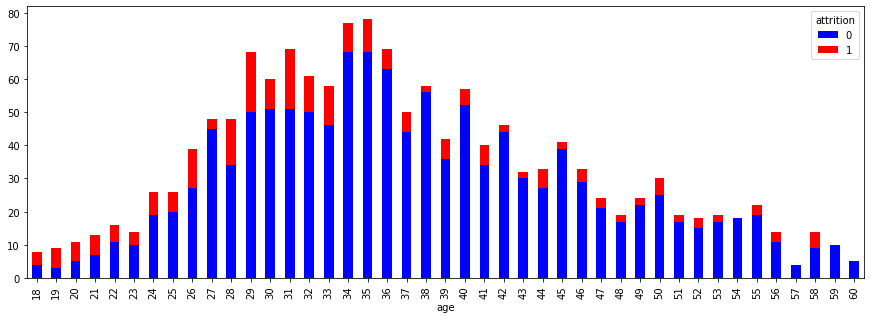

In [19]:
pd.crosstab( df4['age'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );



### H2 Funcionários com mais tempo de educação deveriam ter uma maior tendência em sair da empresa.

**VERDADEIRA** Quanto maior o tempo de educação maior é a tendência de sair da empresa.


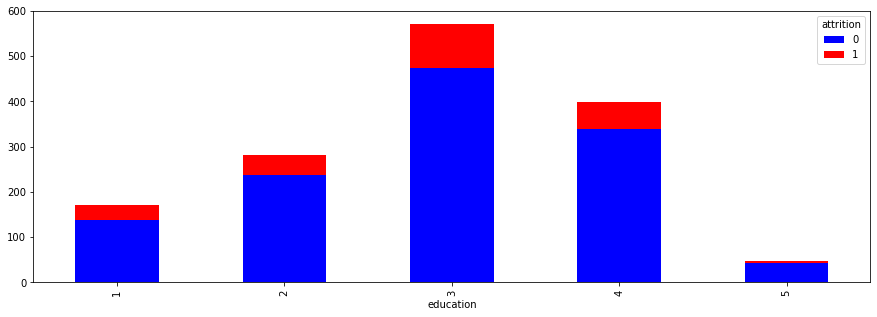

In [20]:
pd.crosstab( df4['education'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );


### H3. Funcionários com uma maior distância da empresa deveriam ter uma maio tendência em trocar de empresa.



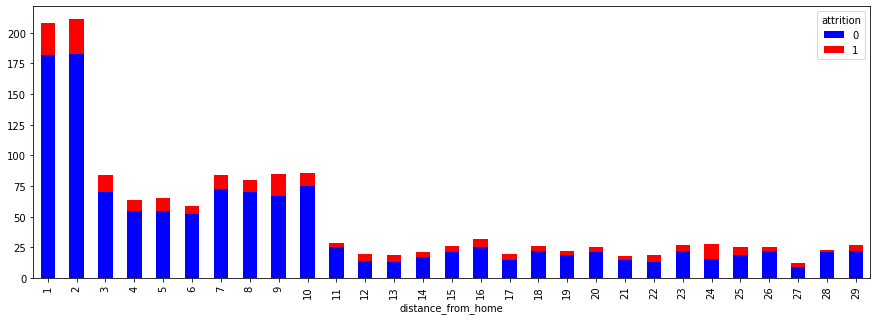

In [21]:
pd.crosstab( df4['distance_from_home'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );


### H4. Funcionários com uma maior satisfação no trabalho deveria ter uma tendência menor em tocar de empresa.



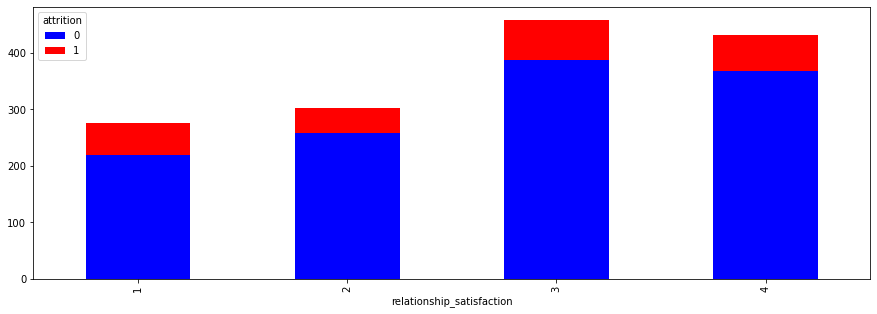

In [22]:
pd.crosstab( df4['relationship_satisfaction'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );


### H5. Quanto maior o aumento percentual do salário menor deveria ser a tendência de troca de empresa.



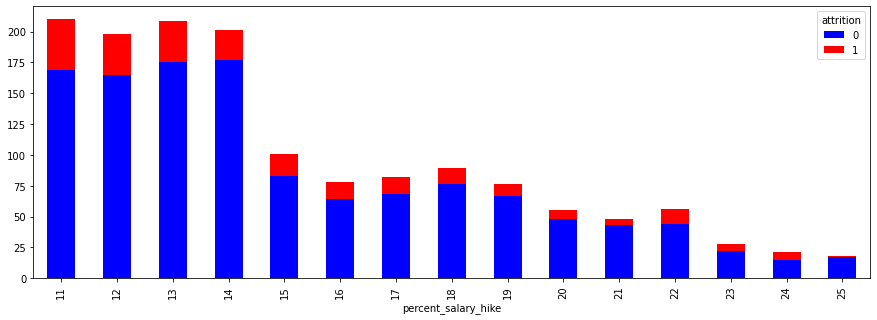

In [23]:
pd.crosstab( df4['percent_salary_hike'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );

### H6.  Quanto maior o equilibro da vida profissional menor a tendência de trocar de empresa.
**FALSA** Quanto maior o equilibrio da vida profissional maior é a tendência de trocar de empresa.

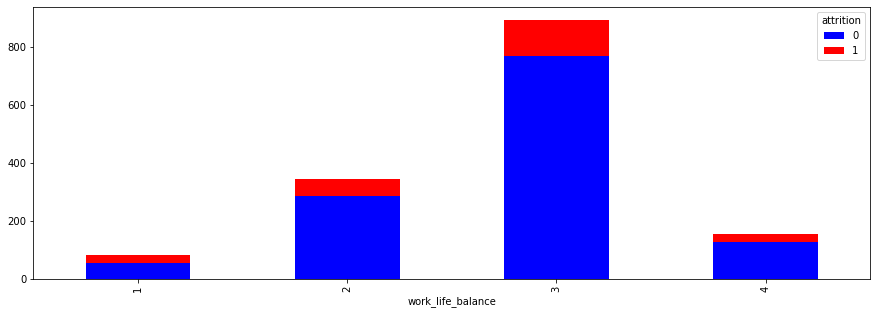

In [24]:
'work_life_balance'
pd.crosstab( df4['work_life_balance'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );

### H7. Quanto mais tempo se passou da ultima promoção maior deveria ser a tendência de trocar de empresa.
**FALSA** Quanto maior o tempo des da ultima promoção menos as pessoas trocam de empresa.



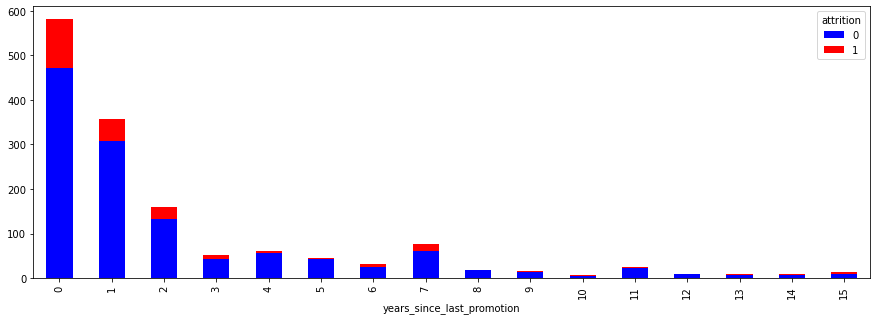

In [25]:
pd.crosstab(df4['years_since_last_promotion'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );

### H8. Funcionários com mais anos de trabalho deveriam ter uma tendência menor de torcar de empresa.



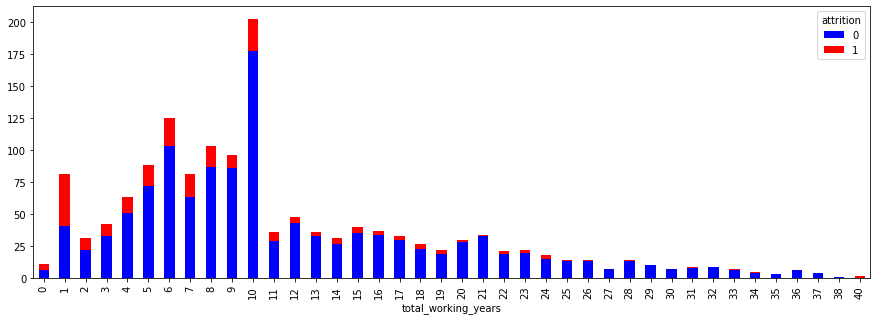

In [26]:
pd.crosstab( df4['total_working_years'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );

### H9. Quanto maior o tempo na função atual menor deveria ser a tendência de trocar de empresa.

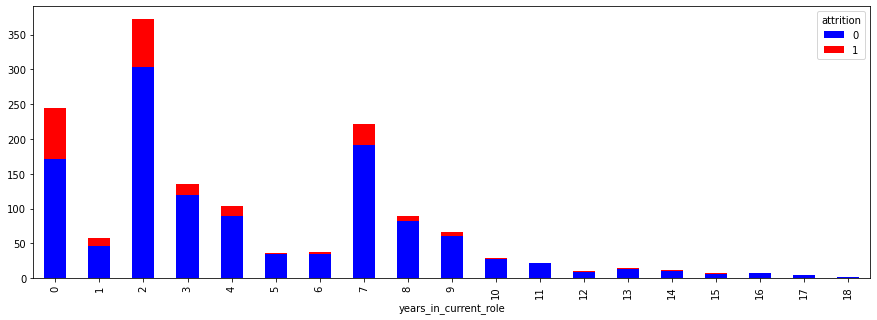

In [27]:

pd.crosstab( df4['years_in_current_role'], df4['attrition'] ).plot( kind = 'bar', stacked = True, figsize =( 15, 5), color = ['blue', 'red'] );

## 4.3. Análise Multivariada

### 4.3.1 Numerical Variable

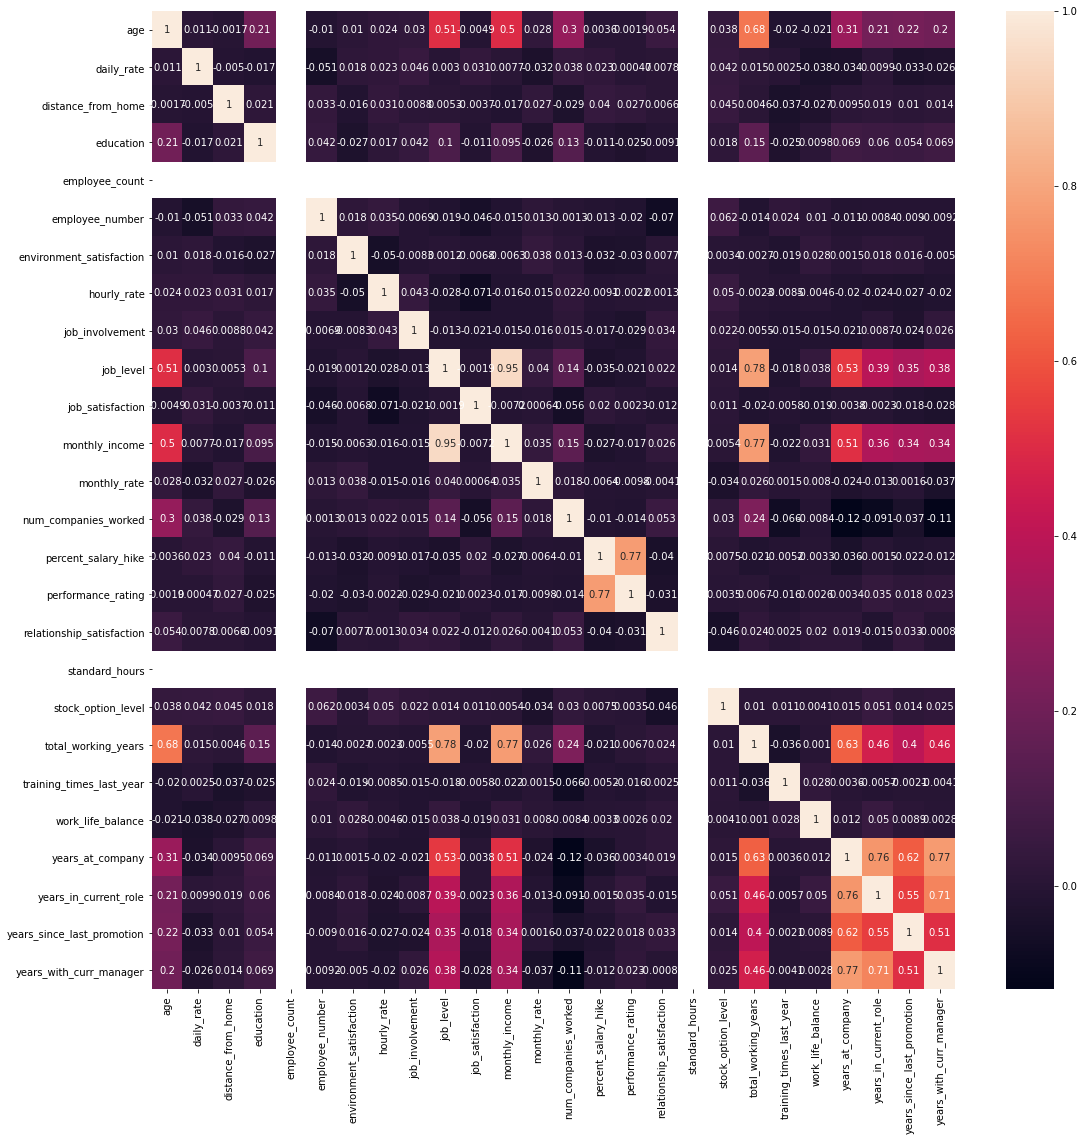

In [28]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot = True );

# 5.0. DATA PREPARATION 

In [174]:
df5 = df4.copy()

## 5.1. Encoding

In [175]:
X_cat = cat_attributes[['business_travel', 'department', 'education_field',
       'gender', 'job_role', 'marital_status']]

onn = OneHotEncoder()

X_cat = onn.fit_transform( X_cat ).toarray()

X_cat = pd.DataFrame( X_cat )

X_numerical = num_attributes[['age', 'daily_rate', 'distance_from_home', 'education',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'hourly_rate', 'job_involvement', 'job_level', 'job_satisfaction',
       'monthly_income', 'monthly_rate', 'num_companies_worked',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager']]

df = pd.concat( [ X_numerical,X_cat], axis = 1 )

In [176]:
df_all = pd.concat([df,df5['attrition']], axis = 1)

## 5.2. Balanceamento da variavel resposta 

In [177]:
#trocando a coluna target de posição
#df5 = df5[ ['attrition'] + [ col for col in df5.columns if col != 'attrition' ] ]

#separando o X e Y
x = df_all.iloc[:, 0:52]
y = df_all.iloc[:, -1]

#criando o balanceamento SMOTE
smote = SMOTE()

#aplicando o balanceamento
x, y = smote.fit_resample( x, y )




## 5.3. Rescaling

In [178]:
mms = MinMaxScaler()
x = mms.fit_transform( x )


# 6.0. MACHINE LEARNING MODELLING 

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.25 )

## 6.1. Logistic Regression

In [181]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [189]:
y_pred = logistic.predict(X_test)

accuracy_score(y_test, y_pred)* 100

85.57536466774717

In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       299
           1       0.85      0.87      0.86       318

    accuracy                           0.86       617
   macro avg       0.86      0.86      0.86       617
weighted avg       0.86      0.86      0.86       617



## 6.2. Random Forest 

In [220]:
forest = RandomForestClassifier()
forest.fit( X_train, y_train )

RandomForestClassifier()

In [301]:
y_pred = forest.predict( X_test )
accuracy_score( y_test, y_pred )*100

92.22042139384116

In [227]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       299
           1       0.97      0.88      0.92       318

    accuracy                           0.92       617
   macro avg       0.93      0.92      0.92       617
weighted avg       0.93      0.92      0.92       617



## 6.3. Redes Neurais 

In [237]:
X_train.shape

(1849, 52)

In [239]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add( tf.keras.layers.Dense( units = 26, activation='relu', input_shape=( 52, ) ) )
rede_neural.add( tf.keras.layers.Dense( units = 26, activation='relu' ) )
rede_neural.add( tf.keras.layers.Dense( units = 26, activation='relu' ) )
rede_neural.add( tf.keras.layers.Dense( units = 1, activation='sigmoid' ) )

In [241]:
rede_neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                1378      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 27        
Total params: 2,809
Trainable params: 2,809
Non-trainable params: 0
_________________________________________________________________


In [242]:
#compilando a rede neural

rede_neural.compile( optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'] )

In [243]:
#treinamento(ajuste dos pesos)
rede_neural.fit( X_train, y_train, epochs=200 )

Epoch 1/200
58/58 [==============================] - 0s 792us/step - loss: 0.6754 - accuracy: 0.5841
Epoch 2/200
58/58 [==============================] - 0s 757us/step - loss: 0.5728 - accuracy: 0.7393
Epoch 3/200
58/58 [==============================] - 0s 747us/step - loss: 0.4462 - accuracy: 0.8015
Epoch 4/200
58/58 [==============================] - 0s 791us/step - loss: 0.3906 - accuracy: 0.8291
Epoch 5/200
58/58 [==============================] - 0s 739us/step - loss: 0.3632 - accuracy: 0.8448
Epoch 6/200
58/58 [==============================] - 0s 757us/step - loss: 0.3442 - accuracy: 0.8594
Epoch 7/200
58/58 [==============================] - 0s 808us/step - loss: 0.3323 - accuracy: 0.8588
Epoch 8/200
58/58 [==============================] - 0s 688us/step - loss: 0.3224 - accuracy: 0.8686
Epoch 9/200
58/58 [==============================] - 0s 774us/step - loss: 0.3079 - accuracy: 0.8745
Epoch 10/200
58/58 [==============================] - 0s 688us/step - loss: 0.3003 - accura

58/58 [==============================] - 0s 860us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 82/200
58/58 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 83/200
58/58 [==============================] - 0s 671us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 84/200
58/58 [==============================] - 0s 619us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 85/200
58/58 [==============================] - 0s 602us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 86/200
58/58 [==============================] - 0s 619us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 87/200
58/58 [==============================] - 0s 619us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 88/200
58/58 [==============================] - 0s 705us/step - loss: 0.0051 - accuracy: 0.9995
Epoch 89/200
58/58 [==============================] - 0s 671us/step - loss: 0.0086 - accuracy: 0.9978
Epoch 90/200
58/58 [==============================] - 0s 619us/step - loss: 0.0178 - accuracy: 0.

58/58 [==============================] - 0s 997us/step - loss: 2.0584e-04 - accuracy: 1.0000
Epoch 160/200
58/58 [==============================] - 0s 997us/step - loss: 1.9084e-04 - accuracy: 1.0000
Epoch 161/200
58/58 [==============================] - 0s 825us/step - loss: 1.8268e-04 - accuracy: 1.0000
Epoch 162/200
58/58 [==============================] - 0s 843us/step - loss: 1.8080e-04 - accuracy: 1.0000
Epoch 163/200
58/58 [==============================] - 0s 843us/step - loss: 1.8409e-04 - accuracy: 1.0000
Epoch 164/200
58/58 [==============================] - 0s 911us/step - loss: 1.8830e-04 - accuracy: 1.0000
Epoch 165/200
58/58 [==============================] - 0s 860us/step - loss: 1.5991e-04 - accuracy: 1.0000
Epoch 166/200
58/58 [==============================] - 0s 843us/step - loss: 1.5224e-04 - accuracy: 1.0000
Epoch 167/200
58/58 [==============================] - 0s 825us/step - loss: 1.5539e-04 - accuracy: 1.0000
Epoch 168/200
58/58 [==============================

In [244]:
#avaliando com a base de teste
y_pred = rede_neural.predict( X_test )

In [246]:
#transformação dos valores de saida
y_pred = ( y_pred >= 0.5 )

<AxesSubplot:>

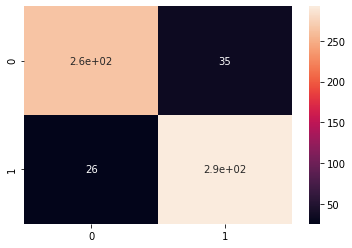

In [248]:
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot = True)

In [250]:
print(classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       299
           1       0.89      0.92      0.91       318

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617



# SALVANDO O CLASSIFICADOR

In [253]:
#Salvando o Classificador 
with open( 'variaveis_modelo.pkl', 'wb' ) as f:
        pickle.dump([smote, onn, mms, logistic], f )